In [1]:
from heeps.util.multiCPU import multiCPU
import proper
from copy import deepcopy
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
folder = '/mnt/disk4tb/METIS/METIS_CBASIC_CUBES/water_vapor'
Z1 = fits.getdata(os.path.join(folder, 'cube_Cbasic_20210601_3600s_100ms_0piston_meters_scao_only_720_WV_zpols_100_nLF_1_nHF_1.fits'))
Z10 = fits.getdata(os.path.join(folder, 'cube_Cbasic_20210601_3600s_100ms_0piston_meters_scao_only_720_WV_zpols_100_nLF_1_nHF_10.fits'))
Z100 = fits.getdata(os.path.join(folder, 'cube_Cbasic_20210601_3600s_100ms_0piston_meters_scao_only_720_WV_zpols_100_nLF_1_nHF_100.fits'))

## QACITS 10Hz

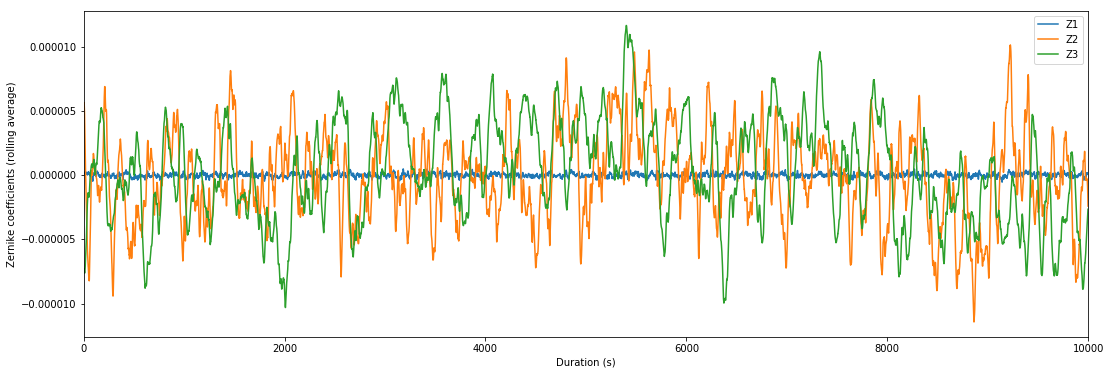

In [3]:
nframes = 10000
z=[1,2,3]
plt.figure(figsize=(18,6))
[plt.plot(Z10[:nframes,x-1], label='Z%s'%x) for x in z]
plt.legend()
plt.xlabel('Duration (s)')
plt.ylabel('Zernike coefficients (rolling average)')
plt.xlim((0, nframes));

## QACITS 10Hz, PSI 10Hz

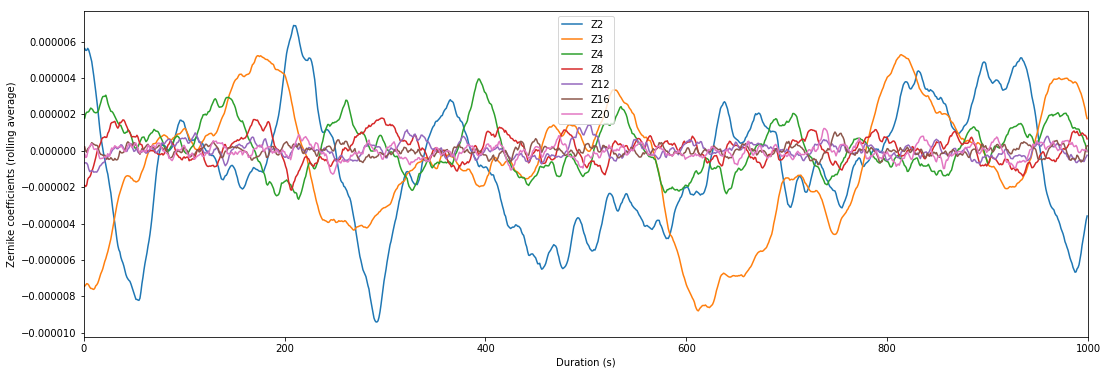

In [4]:
nframes = 1000
z=[2,3,4,8,12,16,20]
plt.figure(figsize=(18,6))
[plt.plot(Z1[:nframes,x-1], label='Z%s'%x) for x in z]
plt.legend()
plt.xlabel('Duration (s)')
plt.ylabel('Zernike coefficients (rolling average)')
plt.xlim((0, nframes));

## QACITS 10Hz, PSI 1Hz

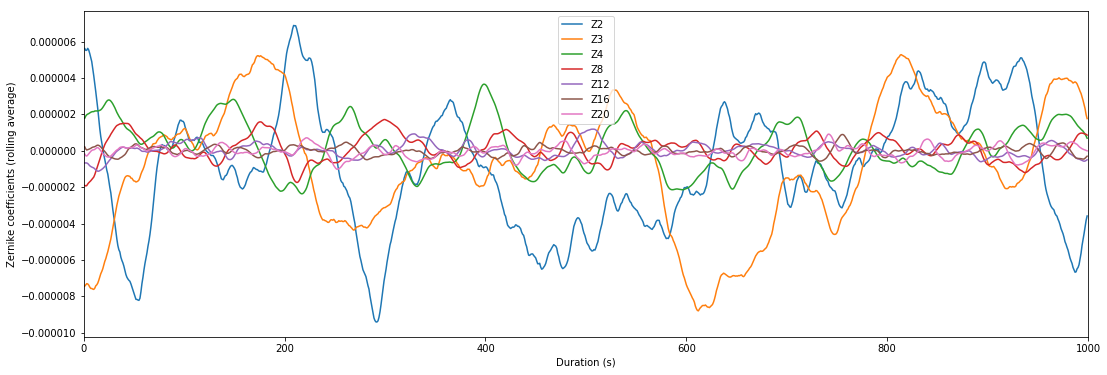

In [5]:
nframes = 1000
z=[2,3,4,8,12,16,20]
plt.figure(figsize=(18,6))
[plt.plot(Z10[:nframes,x-1], label='Z%s'%x) for x in z]
plt.legend()
plt.xlabel('Duration (s)')
plt.ylabel('Zernike coefficients (rolling average)')
plt.xlim((0, nframes));

## QACITS 10Hz, PSI 0.1Hz

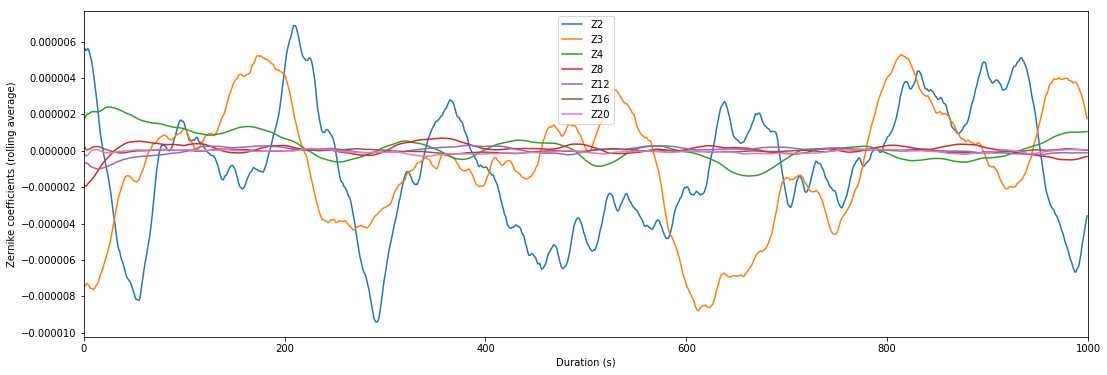

In [6]:
nframes = 1000
z=[2,3,4,8,12,16,20]
plt.figure(figsize=(18,6))
[plt.plot(Z100[:nframes,x-1], label='Z%s'%x) for x in z]
plt.legend()
plt.xlabel('Duration (s)')
plt.ylabel('Zernike coefficients (rolling average)')
plt.xlim((0, nframes));

## WFE after wavefront reconstruction

In [7]:
scaling = 1200/8814.11*1e9
nimg = 720
wf = proper.prop_begin(nimg, 1, nimg, 1)
dir_current = '/mnt/disk4tb/METIS/METIS_CBASIC_CUBES'
pup = fits.getdata(os.path.join(dir_current, 'water_vapor/mask_Cbasic_20210601_720.fits'))
pup[pup < .5] = 0
def get_rms(frame):
    return np.std(frame[frame!=0])
def srms(wf, zpols):
    phi = proper.prop_zernikes(wf, np.arange(len(zpols)) + 1, zpols)
    phi[pup==0] = 0
    return get_rms(phi)

In [8]:
try:
    rms_Z1 = fits.getdata(os.path.join(dir_current, 'water_vapor/rms_Z1.fits'))
    print('getdata rms_Z1.fits')
except FileNotFoundError:
    print('writeto rms_Z1.fits')
    rms_Z1 = multiCPU(srms, posargs=[deepcopy(wf)], posvars=[Z1[:nframes]], case='PSI 10Hz', verbose=True)
    fits.writeto(os.path.join(dir_current, 'water_vapor/rms_Z1.fits'), np.float32(rms))

getdata rms_Z1.fits


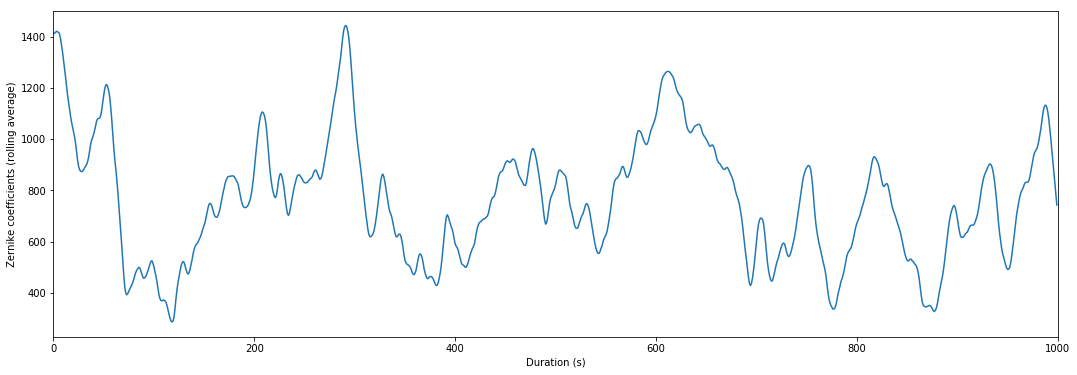

In [9]:
plt.figure(figsize=(18,6))
plt.plot(rms_Z1*scaling)
#plt.legend()
plt.xlabel('Duration (s)')
plt.ylabel('Zernike coefficients (rolling average)')
plt.xlim((0, nframes));

## WFE (sqrt(sum(Z^2)))

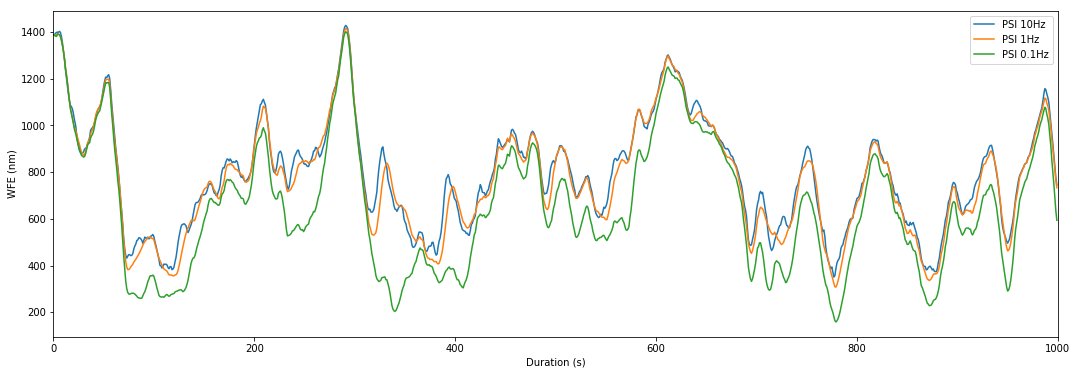

In [10]:
nframes = 1000
plt.figure(figsize=(18,6))
plt.plot(np.sqrt(np.sum(Z1[:nframes]**2,1))*scaling, label='PSI 10Hz')
plt.plot(np.sqrt(np.sum(Z10[:nframes]**2,1))*scaling, label='PSI 1Hz')
plt.plot(np.sqrt(np.sum(Z100[:nframes]**2,1))*scaling, label='PSI 0.1Hz')
plt.legend()
plt.xlabel('Duration (s)')
plt.ylabel('WFE (nm)')
plt.xlim((0, nframes));

## WFE (sqrt(sum(Z^2))) -- modes Z4 -> 100

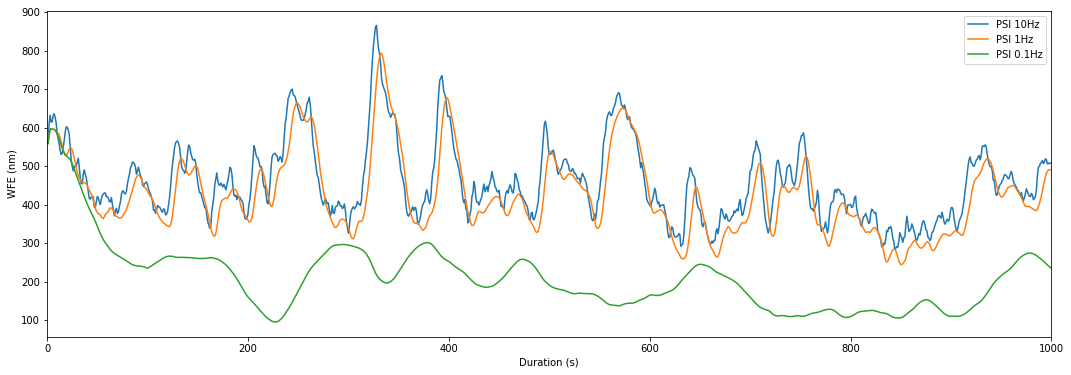

In [11]:
nframes = 1000
plt.figure(figsize=(18,6))
plt.plot(np.sqrt(np.sum(Z1[:nframes,3:]**2,1))*scaling, label='PSI 10Hz')
plt.plot(np.sqrt(np.sum(Z10[:nframes,3:]**2,1))*scaling, label='PSI 1Hz')
plt.plot(np.sqrt(np.sum(Z100[:nframes,3:]**2,1))*scaling, label='PSI 0.1Hz')
plt.legend()
plt.xlabel('Duration (s)')
plt.ylabel('WFE (nm)')
plt.xlim((0, nframes));